In [11]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [20]:
#read in frf community assignments
arms2_list_comms = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ARMS2_comb_list_comm.csv")
arms2_fluid_comms = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ARMS2_comb_fluid_comm.csv")
arms1_list_comms = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ARMS1_comb_list_comm.csv")
arms1_fluid_comms = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/ARMS1_comb_fluid_comm.csv")
arms1_list_comms

,subject_id,community
0,NDAR_INV003RTV85,7
1,NDAR_INV007W6H7B,7
2,NDAR_INV00BD7VDC,5
3,NDAR_INV00HEV6HB,1
4,NDAR_INV00LH735Y,8
...,...,...
3332,NDAR_INVZY8L7CT1,4
3333,NDAR_INVZYC44GB8,2
3334,NDAR_INVZZ05KY5J,1
3335,NDAR_INVZZFG6J5U,4


In [13]:
#load in longitudinal cognitive data (may not need the above data)
full_nihtb_data = pd.read_csv("/home/rando149/shared/data/Collection_3165_Supporting_Documentation/abcd-tabulated-data-release-5.1/core/neurocognition/nc_y_nihtb.csv", low_memory=False)
#full_lmt_data = pd.read_csv("/home/rando149/shared/data/Collection_3165_Supporting_Documentation/abcd-tabulated-data-release-5.1/core/neurocognition/nc_y_lmt.csv", low_memory=False)
#full_ravlt_data = pd.read_csv("/home/rando149/shared/data/Collection_3165_Supporting_Documentation/abcd-tabulated-data-release-5.1/core/neurocognition/nc_y_ravlt.csv", low_memory=False)
full_nihtb_data.head()

,src_subject_id,eventname,nihtbx_picvocab_date,nihtbx_picvocab_language,nihtbx_picvocab_uncorrected,nihtbx_picvocab_agecorrected,nihtbx_picvocab_v,nihtbx_flanker_date,nihtbx_flanker_language,nihtbx_flanker_uncorrected,...,neurocog_pic_sequence___3,neurocog_pic_vocab___1,neurocog_pic_vocab___2,neurocog_pic_vocab___3,neurocog_reading___1,neurocog_reading___2,neurocog_reading___3,neurocog_working_mem___1,neurocog_working_mem___2,neurocog_working_mem___3
0,NDAR_INV003RTV85,baseline_year_1_arm_1,2018-10-01 12:57:11,en-US,95.0,122.0,v2.0,2018-10-01 13:00:27,en-US,101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NDAR_INV005V6D2C,baseline_year_1_arm_1,2018-04-22 13:38:18,en-US,92.0,122.0,v2.0,2018-04-22 13:42:04,en-US,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NDAR_INV005V6D2C,2_year_follow_up_y_arm_1,2020-07-16 16:56:51,en-US,78.0,83.0,v2.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NDAR_INV007W6H7B,baseline_year_1_arm_1,2017-02-21 13:15:55,en-US,93.0,122.0,v2.0,2017-02-21 13:19:56,en-US,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NDAR_INV007W6H7B,4_year_follow_up_y_arm_1,2021-05-21 16:56:15,en-US,105.0,123.0,v2.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#highlight list, fluid, and flanker metrics to start
selected_nihtb_data = full_nihtb_data[['src_subject_id','eventname','nihtbx_fluidcomp_agecorrected','nihtbx_flanker_agecorrected','nihtbx_list_agecorrected']]
selected_nihtb_data = selected_nihtb_data.rename(columns={'src_subject_id':'subject_id'})
selected_nihtb_data = selected_nihtb_data.dropna(subset=['nihtbx_fluidcomp_agecorrected','nihtbx_flanker_agecorrected','nihtbx_list_agecorrected'])
selected_nihtb_data

,subject_id,eventname,nihtbx_fluidcomp_agecorrected,nihtbx_flanker_agecorrected,nihtbx_list_agecorrected
0,NDAR_INV003RTV85,baseline_year_1_arm_1,98.0,101.0,100.0
1,NDAR_INV005V6D2C,baseline_year_1_arm_1,90.0,74.0,100.0
3,NDAR_INV007W6H7B,baseline_year_1_arm_1,104.0,92.0,107.0
5,NDAR_INV00BD7VDC,baseline_year_1_arm_1,127.0,116.0,145.0
7,NDAR_INV00CY2MDM,baseline_year_1_arm_1,85.0,110.0,80.0
...,...,...,...,...,...
27008,NDAR_INVZZJ3A7BK,baseline_year_1_arm_1,123.0,101.0,140.0
27010,NDAR_INVZZL0VA2F,baseline_year_1_arm_1,71.0,74.0,113.0
27012,NDAR_INVZZLZCKAY,baseline_year_1_arm_1,87.0,88.0,103.0
27018,NDAR_INVZZPKBDAC,baseline_year_1_arm_1,94.0,107.0,103.0


In [39]:
#merge with communites/split accross arms
arms2_fluid_full_data = pd.merge(arms2_fluid_comms, selected_nihtb_data, on='subject_id', how='outer')
arms2_fluid_full_data = arms2_fluid_full_data.dropna(subset=['community'])

arms2_list_full_data = pd.merge(arms2_list_comms, selected_nihtb_data, on='subject_id', how='outer')
arms2_list_full_data = arms2_list_full_data.dropna(subset=['community'])

arms1_fluid_full_data = pd.merge(arms1_fluid_comms, selected_nihtb_data, on='subject_id', how='outer')
arms1_fluid_full_data = arms1_fluid_full_data.dropna(subset=['community'])

arms1_list_full_data = pd.merge(arms1_list_comms, selected_nihtb_data, on='subject_id', how='outer')
arms1_list_full_data = arms1_list_full_data.dropna(subset=['community'])

arms1_list_full_data['community'] = arms1_list_full_data['community'].astype(int)
arms2_list_full_data['community'] = arms2_list_full_data['community'].astype(int)
arms1_fluid_full_data['community'] = arms1_fluid_full_data['community'].astype(int)
arms2_fluid_full_data['community'] = arms2_fluid_full_data['community'].astype(int)
arms1_list_full_data

,subject_id,community,eventname,nihtbx_fluidcomp_agecorrected,nihtbx_flanker_agecorrected,nihtbx_list_agecorrected
0,NDAR_INV003RTV85,7,baseline_year_1_arm_1,98.0,101.0,100.0
2,NDAR_INV007W6H7B,7,baseline_year_1_arm_1,104.0,92.0,107.0
3,NDAR_INV00BD7VDC,5,baseline_year_1_arm_1,127.0,116.0,145.0
5,NDAR_INV00HEV6HB,1,baseline_year_1_arm_1,88.0,74.0,93.0
7,NDAR_INV00LH735Y,8,baseline_year_1_arm_1,75.0,88.0,82.0
...,...,...,...,...,...,...
11665,NDAR_INVZY8L7CT1,4,NaN,NaN,NaN,NaN
11667,NDAR_INVZYC44GB8,2,baseline_year_1_arm_1,93.0,119.0,100.0
11674,NDAR_INVZZ05KY5J,1,NaN,NaN,NaN,NaN
11681,NDAR_INVZZFG6J5U,4,baseline_year_1_arm_1,83.0,101.0,80.0


In [40]:
#switch this to keeping only communites within 
arms1_comms_to_keep = [1,2,3,4,5,6,7,8,9]
arms2_comms_to_keep = [1,2,3,4,5,6,7]

list_arms1_filtered_comms = arms1_list_full_data[arms1_list_full_data['community'].isin(arms1_comms_to_keep)]
list_arms2_filtered_comms = arms2_list_full_data[arms2_list_full_data['community'].isin(arms2_comms_to_keep)]
fluid_arms1_filtered_comms = arms1_fluid_full_data[arms1_fluid_full_data['community'].isin(arms1_comms_to_keep)]
fluid_arms2_filtered_comms = arms2_fluid_full_data[arms2_fluid_full_data['community'].isin(arms2_comms_to_keep)]

list_arms1_filtered_comms

,subject_id,community,eventname,nihtbx_fluidcomp_agecorrected,nihtbx_flanker_agecorrected,nihtbx_list_agecorrected
0,NDAR_INV003RTV85,7,baseline_year_1_arm_1,98.0,101.0,100.0
2,NDAR_INV007W6H7B,7,baseline_year_1_arm_1,104.0,92.0,107.0
3,NDAR_INV00BD7VDC,5,baseline_year_1_arm_1,127.0,116.0,145.0
5,NDAR_INV00HEV6HB,1,baseline_year_1_arm_1,88.0,74.0,93.0
7,NDAR_INV00LH735Y,8,baseline_year_1_arm_1,75.0,88.0,82.0
...,...,...,...,...,...,...
11665,NDAR_INVZY8L7CT1,4,NaN,NaN,NaN,NaN
11667,NDAR_INVZYC44GB8,2,baseline_year_1_arm_1,93.0,119.0,100.0
11674,NDAR_INVZZ05KY5J,1,NaN,NaN,NaN,NaN
11681,NDAR_INVZZFG6J5U,4,baseline_year_1_arm_1,83.0,101.0,80.0


In [41]:
#convert community to a categorical variable to ensure proper ordering on the x-axis
list_arms1_filtered_comms.loc[:, 'community'] = pd.Categorical(list_arms1_filtered_comms['community'])
list_arms2_filtered_comms.loc[:, 'community'] = pd.Categorical(list_arms2_filtered_comms['community'])
fluid_arms1_filtered_comms.loc[:, 'community'] = pd.Categorical(fluid_arms1_filtered_comms['community'])
fluid_arms2_filtered_comms.loc[:, 'community'] = pd.Categorical(fluid_arms2_filtered_comms['community'])

In [42]:
list_arms1_filtered_comms.dtypes

subject_id                        object
community                          int64
eventname                         object
nihtbx_fluidcomp_agecorrected    float64
nihtbx_flanker_agecorrected      float64
nihtbx_list_agecorrected         float64
dtype: object

In [43]:
def se(x):
    return np.std(x, ddof=1) / np.sqrt(len(x))

In [44]:
#calculate mean and standard error by community &&&& eventname!! for ARMS1 and ARMS2
mean_and_se_by_community_arms1_list = list_arms1_filtered_comms.groupby(['community','eventname'], observed=False).agg(
    {col: ['mean', se] for col in list_arms1_filtered_comms.filter(regex='^(nihtbx).*').columns})
mean_and_se_by_community_arms2_list = list_arms2_filtered_comms.groupby(['community','eventname'], observed=False).agg(
    {col: ['mean', se] for col in list_arms2_filtered_comms.filter(regex='^(nihtbx).*').columns})
mean_and_se_by_community_arms1_fluid = fluid_arms1_filtered_comms.groupby(['community','eventname'], observed=False).agg(
    {col: ['mean', se] for col in fluid_arms1_filtered_comms.filter(regex='^(nihtbx).*').columns})
mean_and_se_by_community_arms2_fluid = fluid_arms2_filtered_comms.groupby(['community','eventname'], observed=False).agg(
    {col: ['mean', se] for col in fluid_arms2_filtered_comms.filter(regex='^(nihtbx).*').columns})


mean_and_se_by_community_arms2_list


nihtbx_fluidcomp_agecorrected             \
                                                            mean         se   
community eventname                                                           
1         2_year_follow_up_y_arm_1                    100.500000   7.643080   
          4_year_follow_up_y_arm_1                    100.250000   8.459462   
          baseline_year_1_arm_1                        99.972966   0.566314   
2         2_year_follow_up_y_arm_1                     98.600000   5.626722   
          4_year_follow_up_y_arm_1                    111.000000        NaN   
          baseline_year_1_arm_1                        94.225379   0.764401   
3         4_year_follow_up_y_arm_1                    103.000000   7.810250   
          baseline_year_1_arm_1                        96.401316   0.784408   
4         2_year_follow_up_y_arm_1                     94.666667   7.255649   
          4_year_follow_up_y_arm_1                     84.666667  13.860415   
          baseline_year_1_arm_1                        96.636238   0.772384   
5         2_year_follow_up_y_arm_1                     94.500000   4.500000   
          4_year_follow_up_y_arm_1                    105.000000   8.602325   
          baseline_year_1_arm_1                        91.466667   0.909699   
6         2_year_follow_up_y_arm_1                    124.000000  22.000000   
          4_year_follow_up_y_arm_1                     97.333333   6.936217   
          baseline_year_1_arm_1                        99.833333   0.882820   
7         4_year_follow_up_y_arm_1                     96.000000   3.511885   
          baseline_year_1_arm_1                        99.509244   1.440188   

                                   nihtbx_flanker_agecorrected             \
                                                          mean         se   
community eventname                                                         
1         2_year_follow_up_y_arm_1                   97.250000   6.046693   
          4_year_follow_up_y_arm_1                   91.750000   4.110454   
          baseline_year_1_arm_1                      97.567960   0.458230   
2         2_year_follow_up_y_arm_1                  101.600000   4.154516   
          4_year_follow_up_y_arm_1                  101.000000        NaN   
          baseline_year_1_arm_1                      95.285985   0.601106   
3         4_year_follow_up_y_arm_1                  105.666667  10.170764   
          baseline_year_1_arm_1                      94.493421   0.577409   
4         2_year_follow_up_y_arm_1                   94.833333   3.833333   
          4_year_follow_up_y_arm_1                   92.000000   7.637626   
          baseline_year_1_arm_1                      97.104554   0.633106   
5         2_year_follow_up_y_arm_1                   99.000000   2.000000   
          4_year_follow_up_y_arm_1                   98.250000  11.621639   
          baseline_year_1_arm_1                      94.572989   0.735445   
6         2_year_follow_up_y_arm_1                   88.500000   0.500000   
          4_year_follow_up_y_arm_1                   96.333333   4.666667   
          baseline_year_1_arm_1                      96.288889   0.704069   
7         4_year_follow_up_y_arm_1                   91.333333   8.089774   
          baseline_year_1_arm_1                      96.114286   1.158196   

                                   nihtbx_list_agecorrected             
                                                       mean         se  
community eventname                                                     
1         2_year_follow_up_y_arm_1               105.750000   8.138130  
          4_year_follow_up_y_arm_1               112.000000   9.442810  
          baseline_year_1_arm_1                  104.261702   0.480806  
2         2_year_follow_up_y_arm_1               100.800000   7.889233  
          4_year_follow_up_y_arm_1               137.000000        NaN  
          baselin

In [45]:
#consolidate columns 
mean_and_se_by_community_arms2_list.columns = ['_'.join(col).strip() for col in mean_and_se_by_community_arms2_list.columns.values]
mean_and_se_by_community_arms1_list.columns = ['_'.join(col).strip() for col in mean_and_se_by_community_arms1_list.columns.values]
mean_and_se_by_community_arms2_fluid.columns = ['_'.join(col).strip() for col in mean_and_se_by_community_arms2_fluid.columns.values]
mean_and_se_by_community_arms1_fluid.columns = ['_'.join(col).strip() for col in mean_and_se_by_community_arms1_fluid.columns.values]

In [47]:
mean_and_se_by_community_arms2_list

nihtbx_fluidcomp_agecorrected_mean  \
community eventname                                                      
1         2_year_follow_up_y_arm_1                          100.500000   
          4_year_follow_up_y_arm_1                          100.250000   
          baseline_year_1_arm_1                              99.972966   
2         2_year_follow_up_y_arm_1                           98.600000   
          4_year_follow_up_y_arm_1                          111.000000   
          baseline_year_1_arm_1                              94.225379   
3         4_year_follow_up_y_arm_1                          103.000000   
          baseline_year_1_arm_1                              96.401316   
4         2_year_follow_up_y_arm_1                           94.666667   
          4_year_follow_up_y_arm_1                           84.666667   
          baseline_year_1_arm_1                              96.636238   
5         2_year_follow_up_y_arm_1                           94.500000   
          4_year_follow_up_y_arm_1                          105.000000   
          baseline_year_1_arm_1                              91.466667   
6         2_year_follow_up_y_arm_1                          124.000000   
          4_year_follow_up_y_arm_1                           97.333333   
          baseline_year_1_arm_1                              99.833333   
7         4_year_follow_up_y_arm_1                           96.000000   
          baseline_year_1_arm_1                              99.509244   

                                    nihtbx_fluidcomp_agecorrected_se  \
community eventname                                                    
1         2_year_follow_up_y_arm_1                          7.643080   
          4_year_follow_up_y_arm_1                          8.459462   
          baseline_year_1_arm_1                             0.566314   
2         2_year_follow_up_y_arm_1                          5.626722   
          4_year_follow_up_y_arm_1                               NaN   
          baseline_year_1_arm_1                             0.764401   
3         4_year_follow_up_y_arm_1                          7.810250   
          baseline_year_1_arm_1                             0.784408   
4         2_year_follow_up_y_arm_1                          7.255649   
          4_year_follow_up_y_arm_1                         13.860415   
          baseline_year_1_arm_1                             0.772384   
5         2_year_follow_up_y_arm_1                          4.500000   
          4_year_follow_up_y_arm_1                          8.602325   
          baseline_year_1_arm_1                             0.909699   
6         2_year_follow_up_y_arm_1                         22.000000   
          4_year_follow_up_y_arm_1                          6.936217   
          baseline_year_1_arm_1                             0.882820   
7         4_year_follow_up_y_arm_1                          3.511885   
          baseline_year_1_arm_1                             1.440188   

                                    nihtbx_flanker_agecorrected_mean  \
community eventname                                                    
1         2_year_follow_up_y_arm_1                         97.250000   
          4_year_follow_up_y_arm_1                         91.750000   
          baseline_year_1_arm_1                            97.567960   
2         2_year_follow_up_y_arm_1                        101.600000   
          4_year_follow_up_y_arm_1                        101.000000   
          baseline_year_1_arm_1                            95.285985   
3         4_year_follow_up_y_arm_1                        105.666667   
          baseline_year_1_arm_1                            94.493421   
4         2_year_follow_up_y_arm_1                         94.833333   
          4_year_follow_up_y_arm_1                         92.000000   
          baseline_year_1_arm_1                            97.104554   
5         2_year_follow_up_y_arm

# capturing all data averages

In [21]:
#calculate mean and standard error for all ABCD participants (nihtbx and upps/bisbas)
#first, save all cognitive and temperament data as dfs and merge it into one 
arms1_test_full_data = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/data/ARMS1_test_FRF_UPPS_short_for_FRF_fixed.csv")
arms1_train_full_data = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/data/ARMS1_train_FRF_UPPS_short_for_FRF_fixed.csv")
arms2_test_full_data = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/data/ARMS2_test_FRF_UPPS_short_for_FRF_fixed.csv")
arms2_train_full_data = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/data/ARMS2_train_FRF_UPPS_short_for_FRF_fixed.csv")

combined_full_data = pd.concat([arms1_test_full_data, arms1_train_full_data, arms2_test_full_data, arms2_train_full_data])

In [22]:
combined_full_data

,Unnamed: 0,dataset_id.baseline_year_1_arm_1.x,src_subject_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1
0,1,47437,NDAR_INV003RTV85,131,F,9.0,2.0,6.0,2.0,10.0,...,122.0,101.0,100.0,86.0,103.0,106.0,81.0,98.0,102.0,99.0
1,3,47437,NDAR_INV007W6H7B,126,M,5.0,1.0,1.0,6.0,6.0,...,122.0,92.0,107.0,103.0,95.0,119.0,110.0,104.0,119.0,114.0
2,4,47437,NDAR_INV00BD7VDC,112,M,6.0,2.0,5.0,11.0,8.0,...,98.0,116.0,145.0,90.0,117.0,116.0,85.0,127.0,90.0,110.0
3,6,47437,NDAR_INV00HEV6HB,124,M,13.0,4.0,7.0,4.0,12.0,...,92.0,74.0,93.0,94.0,103.0,99.0,110.0,88.0,101.0,93.0
4,8,47437,NDAR_INV00LH735Y,109,M,12.0,3.0,6.0,2.0,5.0,...,98.0,88.0,82.0,81.0,56.0,116.0,85.0,75.0,90.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,11858,47437,NDAR_INVZYTK0K1Y,110,F,15.0,9.0,7.0,17.0,13.0,...,131.0,107.0,131.0,81.0,108.0,109.0,129.0,111.0,135.0,128.0
2545,11859,47437,NDAR_INVZZ0348LF,131,F,12.0,6.0,7.0,10.0,7.0,...,102.0,92.0,100.0,94.0,119.0,79.0,100.0,94.0,101.0,97.0
2546,11861,47437,NDAR_INVZZ1MNPK5,124,F,12.0,3.0,5.0,15.0,11.0,...,183.0,119.0,107.0,129.0,152.0,99.0,150.0,134.0,178.0,167.0
2547,11870,47437,NDAR_INVZZLZCKAY,110,F,10.0,3.0,5.0,17.0,9.0,...,98.0,88.0,103.0,90.0,91.0,88.0,107.0,87.0,103.0,94.0


In [23]:
#combined_full_data = combined_full_data.drop('nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1', axis=1)
combined_full_data = combined_full_data.drop('nihtbx_list_agecorrected.baseline_year_1_arm_1', axis=1)

In [24]:
combined_full_data

,Unnamed: 0,dataset_id.baseline_year_1_arm_1.x,src_subject_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1
0,1,47437,NDAR_INV003RTV85,131,F,9.0,2.0,6.0,2.0,10.0,...,10.0,122.0,101.0,86.0,103.0,106.0,81.0,98.0,102.0,99.0
1,3,47437,NDAR_INV007W6H7B,126,M,5.0,1.0,1.0,6.0,6.0,...,10.0,122.0,92.0,103.0,95.0,119.0,110.0,104.0,119.0,114.0
2,4,47437,NDAR_INV00BD7VDC,112,M,6.0,2.0,5.0,11.0,8.0,...,6.0,98.0,116.0,90.0,117.0,116.0,85.0,127.0,90.0,110.0
3,6,47437,NDAR_INV00HEV6HB,124,M,13.0,4.0,7.0,4.0,12.0,...,7.0,92.0,74.0,94.0,103.0,99.0,110.0,88.0,101.0,93.0
4,8,47437,NDAR_INV00LH735Y,109,M,12.0,3.0,6.0,2.0,5.0,...,5.0,98.0,88.0,81.0,56.0,116.0,85.0,75.0,90.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,11858,47437,NDAR_INVZYTK0K1Y,110,F,15.0,9.0,7.0,17.0,13.0,...,10.0,131.0,107.0,81.0,108.0,109.0,129.0,111.0,135.0,128.0
2545,11859,47437,NDAR_INVZZ0348LF,131,F,12.0,6.0,7.0,10.0,7.0,...,5.0,102.0,92.0,94.0,119.0,79.0,100.0,94.0,101.0,97.0
2546,11861,47437,NDAR_INVZZ1MNPK5,124,F,12.0,3.0,5.0,15.0,11.0,...,5.0,183.0,119.0,129.0,152.0,99.0,150.0,134.0,178.0,167.0
2547,11870,47437,NDAR_INVZZLZCKAY,110,F,10.0,3.0,5.0,17.0,9.0,...,5.0,98.0,88.0,90.0,91.0,88.0,107.0,87.0,103.0,94.0


In [25]:
#combine relevant columns for analysis
combined_full_data_rel_cols = combined_full_data.filter(regex='^(src|bis|upps|nihtbx).*')
combined_full_data_rel_cols.loc[:, 'community'] = 'all'
combined_full_data_rel_cols

/tmp/ipykernel_3525045/1763277919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_full_data_rel_cols.loc[:, 'community'] = 'all'


,src_subject_id.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,upps_y_ss_positive_urgency.baseline_year_1_arm_1,upps_y_ss_lack_of_planning.baseline_year_1_arm_1,upps_y_ss_sensation_seeking.baseline_year_1_arm_1,upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV003RTV85,9.0,2.0,6.0,2.0,10.0,7.0,11.0,7.0,10.0,122.0,101.0,86.0,103.0,106.0,81.0,98.0,102.0,99.0,all
1,NDAR_INV007W6H7B,5.0,1.0,1.0,6.0,6.0,8.0,11.0,6.0,10.0,122.0,92.0,103.0,95.0,119.0,110.0,104.0,119.0,114.0,all
2,NDAR_INV00BD7VDC,6.0,2.0,5.0,11.0,8.0,8.0,7.0,11.0,6.0,98.0,116.0,90.0,117.0,116.0,85.0,127.0,90.0,110.0,all
3,NDAR_INV00HEV6HB,13.0,4.0,7.0,4.0,12.0,11.0,12.0,6.0,7.0,92.0,74.0,94.0,103.0,99.0,110.0,88.0,101.0,93.0,all
4,NDAR_INV00LH735Y,12.0,3.0,6.0,2.0,5.0,4.0,6.0,11.0,5.0,98.0,88.0,81.0,56.0,116.0,85.0,75.0,90.0,79.0,all
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,NDAR_INVZYTK0K1Y,15.0,9.0,7.0,17.0,13.0,12.0,6.0,8.0,10.0,131.0,107.0,81.0,108.0,109.0,129.0,111.0,135.0,128.0,all
2545,NDAR_INVZZ0348LF,12.0,6.0,7.0,10.0,7.0,4.0,6.0,10.0,5.0,102.0,92.0,94.0,119.0,79.0,100.0,94.0,101.0,97.0,all
2546,NDAR_INVZZ1MNPK5,12.0,3.0,5.0,15.0,11.0,8.0,11.0,12.0,5.0,183.0,119.0,129.0,152.0,99.0,150.0,134.0,178.0,167.0,all
2547,NDAR_INVZZLZCKAY,10.0,3.0,5.0,17.0,9.0,10.0,9.0,6.0,5.0,98.0,88.0,90.0,91.0,88.0,107.0,87.0,103.0,94.0,all


In [26]:
#group and aggregate by community for all data
mean_and_se_all_data_nih = combined_full_data_rel_cols.groupby('community', observed=False).agg(
    {col: ['mean', se] for col in combined_full_data_rel_cols.filter(regex='^(bis|upps|nihtbx).*').columns}
)

In [27]:
mean_and_se_all_data_nih

bis_y_ss_bas_rr.baseline_year_1_arm_1            \
                                           mean        se   
community                                                   
all                                   10.996104  0.027135   

          bis_y_ss_bas_drive.baseline_year_1_arm_1            \
                                              mean        se   
community                                                      
all                                       4.131959  0.028465   

          bis_y_ss_bas_fs.baseline_year_1_arm_1            \
                                           mean        se   
community                                                   
all                                     5.69703  0.024577   

          bis_y_ss_bis_sum.baseline_year_1_arm_1            \
                                            mean        se   
community                                                    
all                                     9.514892  0.034862   

          upps_y_ss_negative_urgency.baseline_year_1_arm_1            ...  \
                                                      mean        se  ...   
community                                                             ...   
all                                               8.485843  0.024573  ...   

          nihtbx_picture_agecorrected.baseline_year_1_arm_1            \
                                                       mean        se   
community                                                               
all                                              100.990748  0.150222   

          nihtbx_reading_agecorrected.baseline_year_1_arm_1            \
                                                       mean        se   
community                                                               
all                                              102.497345  0.177264   

          nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1            \
                                                         mean        se   
community                                                                 
all                                                95.568633   0.161352   

          nihtbx_cryst_agecorrected.baseline_year_1_arm_1           \
                                                     mean       se   
community                                                            
all                                              105.4887  0.16972   

          nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1            
                                                         mean        se  
community                                                                
all                                               100.375427   0.166685  

[1 rows x 36 columns]

In [28]:
#consolidate columns
mean_and_se_all_data_nih.columns = ['_'.join(col).strip() for col in mean_and_se_all_data_nih.columns.values]

In [29]:
mean_and_se_all_data_nih

,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,bis_y_ss_bas_drive.baseline_year_1_arm_1_se,bis_y_ss_bas_fs.baseline_year_1_arm_1_mean,bis_y_ss_bas_fs.baseline_year_1_arm_1_se,bis_y_ss_bis_sum.baseline_year_1_arm_1_mean,bis_y_ss_bis_sum.baseline_year_1_arm_1_se,upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean,upps_y_ss_negative_urgency.baseline_year_1_arm_1_se,...,nihtbx_picture_agecorrected.baseline_year_1_arm_1_mean,nihtbx_picture_agecorrected.baseline_year_1_arm_1_se,nihtbx_reading_agecorrected.baseline_year_1_arm_1_mean,nihtbx_reading_agecorrected.baseline_year_1_arm_1_se,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_se,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_mean,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_se,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_se
community,,,,,,,,,,,,,,,,,,,,,
all,10.996104,0.027135,4.131959,0.028465,5.69703,0.024577,9.514892,0.034862,8.485843,0.024573,...,100.990748,0.150222,102.497345,0.177264,95.568633,0.161352,105.4887,0.16972,100.375427,0.166685


# combining all data averages with other communities

In [30]:
#merge arms1/arms2 community data with all data metrics
mean_and_se_by_community_arms1_combined = pd.concat([mean_and_se_all_data_nih, mean_and_se_by_community_arms1])
mean_and_se_by_community_arms2_combined = pd.concat([mean_and_se_all_data_nih, mean_and_se_by_community_arms2])
#mean_and_se_xgb_arms2comm_arms1data_combined = pd.concat([mean_and_se_all_data_nih, mean_and_se_xgb_arms2comm_arms1data])
#mean_and_se_xgb_arms1comm_arms2data_combined = pd.concat([mean_and_se_all_data_nih, mean_and_se_xgb_arms1comm_arms2data])

In [31]:
mean_and_se_by_community_arms2_combined

,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,bis_y_ss_bas_drive.baseline_year_1_arm_1_se,bis_y_ss_bas_fs.baseline_year_1_arm_1_mean,bis_y_ss_bas_fs.baseline_year_1_arm_1_se,bis_y_ss_bis_sum.baseline_year_1_arm_1_mean,bis_y_ss_bis_sum.baseline_year_1_arm_1_se,upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean,upps_y_ss_negative_urgency.baseline_year_1_arm_1_se,...,nihtbx_reading_agecorrected.baseline_year_1_arm_1_mean,nihtbx_reading_agecorrected.baseline_year_1_arm_1_se,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_se,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_mean,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_se,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_se,nihtbx_list_agecorrected.baseline_year_1_arm_1_mean,nihtbx_list_agecorrected.baseline_year_1_arm_1_se
community,,,,,,,,,,,,,,,,,,,,,
all,10.996104,0.027135,4.131959,0.028465,5.697030,0.024577,9.514892,0.034862,8.485843,0.024573,...,102.497345,0.177264,95.568633,0.161352,105.488700,0.169720,100.375427,0.166685,NaN,NaN
1,10.260391,0.091910,2.850856,0.048032,5.212714,0.080854,8.850856,0.109162,8.198044,0.078649,...,107.732641,0.713359,99.976750,0.559360,112.486000,0.662457,107.208000,0.588587,104.306968,0.474238
2,10.983271,0.110331,2.946097,0.062359,6.053903,0.099660,9.981413,0.143748,9.986989,0.097899,...,100.600372,0.741724,94.253308,0.757053,103.397732,0.715974,98.364083,0.743507,100.066914,0.636610
3,9.811688,0.150008,2.235931,0.076526,3.945887,0.097908,8.924242,0.179709,7.082251,0.113855,...,101.571429,0.846689,96.415755,0.778575,104.557987,0.818142,100.282276,0.799550,100.558442,0.660352
4,12.708494,0.094765,7.781853,0.078263,6.681467,0.108358,10.092664,0.173650,8.113900,0.109997,...,101.400000,0.776470,96.572584,0.762482,103.766075,0.742977,99.923471,0.746039,100.708494,0.661251
5,12.775568,0.121944,8.153409,0.102644,7.914773,0.134811,11.147727,0.221620,10.514205,0.147717,...,97.796591,0.884986,91.466667,0.904516,99.938040,0.851053,94.543103,0.847479,96.076989,0.728295
6,10.547684,0.151498,2.455041,0.085547,5.098093,0.120626,9.084469,0.185185,7.427793,0.128554,...,105.147139,1.016562,99.743094,0.874404,108.977961,0.958217,104.933884,0.924118,101.953678,0.771780
7,8.338843,0.286893,0.000000,0.000000,3.958678,0.202735,8.049587,0.295944,7.975207,0.229823,...,106.498347,1.747931,99.509244,1.428236,110.531092,1.597516,105.752941,1.425084,104.904959,1.238672


In [34]:
#mean_and_se_xgb_arms2comm_arms1data_combined

In [35]:
#reset index to make community a column
mean_and_se_by_community_arms1_combined = mean_and_se_by_community_arms1_combined.reset_index()
mean_and_se_by_community_arms2_combined = mean_and_se_by_community_arms2_combined.reset_index()
#mean_and_se_xgb_arms2comm_arms1data_combined = mean_and_se_xgb_arms2comm_arms1data_combined.reset_index()
#mean_and_se_xgb_arms1comm_arms2data_combined = mean_and_se_xgb_arms1comm_arms2data_combined.reset_index()

In [36]:
mean_and_se_by_community_arms2_combined

,community,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,bis_y_ss_bas_drive.baseline_year_1_arm_1_se,bis_y_ss_bas_fs.baseline_year_1_arm_1_mean,bis_y_ss_bas_fs.baseline_year_1_arm_1_se,bis_y_ss_bis_sum.baseline_year_1_arm_1_mean,bis_y_ss_bis_sum.baseline_year_1_arm_1_se,upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean,...,nihtbx_reading_agecorrected.baseline_year_1_arm_1_mean,nihtbx_reading_agecorrected.baseline_year_1_arm_1_se,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_se,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_mean,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_se,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_se,nihtbx_list_agecorrected.baseline_year_1_arm_1_mean,nihtbx_list_agecorrected.baseline_year_1_arm_1_se
0,all,10.996104,0.027135,4.131959,0.028465,5.697030,0.024577,9.514892,0.034862,8.485843,...,102.497345,0.177264,95.568633,0.161352,105.488700,0.169720,100.375427,0.166685,NaN,NaN
1,1,10.260391,0.091910,2.850856,0.048032,5.212714,0.080854,8.850856,0.109162,8.198044,...,107.732641,0.713359,99.976750,0.559360,112.486000,0.662457,107.208000,0.588587,104.306968,0.474238
2,2,10.983271,0.110331,2.946097,0.062359,6.053903,0.099660,9.981413,0.143748,9.986989,...,100.600372,0.741724,94.253308,0.757053,103.397732,0.715974,98.364083,0.743507,100.066914,0.636610
3,3,9.811688,0.150008,2.235931,0.076526,3.945887,0.097908,8.924242,0.179709,7.082251,...,101.571429,0.846689,96.415755,0.778575,104.557987,0.818142,100.282276,0.799550,100.558442,0.660352
4,4,12.708494,0.094765,7.781853,0.078263,6.681467,0.108358,10.092664,0.173650,8.113900,...,101.400000,0.776470,96.572584,0.762482,103.766075,0.742977,99.923471,0.746039,100.708494,0.661251
5,5,12.775568,0.121944,8.153409,0.102644,7.914773,0.134811,11.147727,0.221620,10.514205,...,97.796591,0.884986,91.466667,0.904516,99.938040,0.851053,94.543103,0.847479,96.076989,0.728295
6,6,10.547684,0.151498,2.455041,0.085547,5.098093,0.120626,9.084469,0.185185,7.427793,...,105.147139,1.016562,99.743094,0.874404,108.977961,0.958217,104.933884,0.924118,101.953678,0.771780
7,7,8.338843,0.286893,0.000000,0.000000,3.958678,0.202735,8.049587,0.295944,7.975207,...,106.498347,1.747931,99.509244,1.428236,110.531092,1.597516,105.752941,1.425084,104.904959,1.238672


In [38]:
#convert data from wide to long format
value_columns = [col for col in mean_and_se_by_community_arms1_combined.columns if col != 'community']
value_columns2 = [col for col in mean_and_se_by_community_arms2_combined.columns if col != 'community']
value_columns

['bis_y_ss_bas_rr.baseline_year_1_arm_1_mean',
 'bis_y_ss_bas_rr.baseline_year_1_arm_1_se',
 'bis_y_ss_bas_drive.baseline_year_1_arm_1_mean',
 'bis_y_ss_bas_drive.baseline_year_1_arm_1_se',
 'bis_y_ss_bas_fs.baseline_year_1_arm_1_mean',
 'bis_y_ss_bas_fs.baseline_year_1_arm_1_se',
 'bis_y_ss_bis_sum.baseline_year_1_arm_1_mean',
 'bis_y_ss_bis_sum.baseline_year_1_arm_1_se',
 'upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean',
 'upps_y_ss_negative_urgency.baseline_year_1_arm_1_se',
 'upps_y_ss_positive_urgency.baseline_year_1_arm_1_mean',
 'upps_y_ss_positive_urgency.baseline_year_1_arm_1_se',
 'upps_y_ss_lack_of_planning.baseline_year_1_arm_1_mean',
 'upps_y_ss_lack_of_planning.baseline_year_1_arm_1_se',
 'upps_y_ss_sensation_seeking.baseline_year_1_arm_1_mean',
 'upps_y_ss_sensation_seeking.baseline_year_1_arm_1_se',
 'upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1_mean',
 'upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1_se',
 'nihtbx_picvocab_agecorrected.baseline_year

In [39]:
#convert data from wide to long format
mean_and_se_by_community_long_arms1 = pd.melt(mean_and_se_by_community_arms1_combined, id_vars=['community'], value_vars=value_columns, var_name='metric', value_name='value')
mean_and_se_by_community_long_arms2 = pd.melt(mean_and_se_by_community_arms2_combined, id_vars=['community'], value_vars=value_columns, var_name='metric', value_name='value')
#mean_and_se_xgb_arms2comm_arms1data_long = pd.melt(mean_and_se_xgb_arms2comm_arms1data_combined, id_vars=['community'], value_vars=value_columns, var_name='metric', value_name='value')
#mean_and_se_xgb_arms1comm_arms2data_long = pd.melt(mean_and_se_xgb_arms1comm_arms2data_combined, id_vars=['community'], value_vars=value_columns, var_name='metric', value_name='value')

In [41]:
#mean_and_se_xgb_arms2comm_arms1data_long

In [42]:
mean_and_se_by_community_long_arms2

,community,metric,value
0,all,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,10.996104
1,1,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,10.260391
2,2,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,10.983271
3,3,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,9.811688
4,4,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,12.708494
...,...,...,...
299,3,nihtbx_list_agecorrected.baseline_year_1_arm_1_se,0.660352
300,4,nihtbx_list_agecorrected.baseline_year_1_arm_1_se,0.661251
301,5,nihtbx_list_agecorrected.baseline_year_1_arm_1_se,0.728295
302,6,nihtbx_list_agecorrected.baseline_year_1_arm_1_se,0.771780


# preparing df for plot w/o all data means

In [59]:
#reset index to make community a column
mean_and_se_by_community_arms2_list = mean_and_se_by_community_arms2_list.reset_index()
mean_and_se_by_community_arms1_list = mean_and_se_by_community_arms1_list.reset_index()
mean_and_se_by_community_arms2_fluid = mean_and_se_by_community_arms2_fluid.reset_index()
mean_and_se_by_community_arms1_fluid = mean_and_se_by_community_arms1_fluid.reset_index()
mean_and_se_by_community_arms1_list

,community,eventname,nihtbx_fluidcomp_agecorrected_mean,nihtbx_fluidcomp_agecorrected_se,nihtbx_flanker_agecorrected_mean,nihtbx_flanker_agecorrected_se,nihtbx_list_agecorrected_mean,nihtbx_list_agecorrected_se
0,1,2_year_follow_up_y_arm_1,91.285714,9.099226,94.857143,5.586670,97.000000,7.023769
1,1,4_year_follow_up_y_arm_1,108.600000,7.513987,111.000000,8.871302,112.000000,10.616026
2,1,baseline_year_1_arm_1,97.965806,0.693028,96.703226,0.556878,102.874194,0.589046
3,2,2_year_follow_up_y_arm_1,102.666667,21.789396,93.000000,5.131601,113.666667,13.666667
4,2,4_year_follow_up_y_arm_1,105.000000,3.109126,107.250000,6.848053,120.250000,9.894232
5,2,baseline_year_1_arm_1,99.529186,0.649951,95.855607,0.491854,102.992320,0.546504
6,3,2_year_follow_up_y_arm_1,77.750000,9.681382,91.750000,6.032896,89.500000,6.144103
7,3,baseline_year_1_arm_1,97.442118,0.816767,95.625616,0.664067,101.487685,0.734786
8,4,2_year_follow_up_y_arm_1,125.000000,NaN,116.000000,NaN,104.000000,NaN
9,4,4_year_follow_up_y_arm_1,92.400000,3.668787,91.800000,7.371567,99.200000,4.091455


In [56]:
#convert data from wide to long format !!!!needs to be fixed!!!!!!
value_columns = [col for col in mean_and_se_by_community_arms2_list.columns if col not in ['community','eventname']]
value_columns

['nihtbx_fluidcomp_agecorrected_mean',
 'nihtbx_fluidcomp_agecorrected_se',
 'nihtbx_flanker_agecorrected_mean',
 'nihtbx_flanker_agecorrected_se',
 'nihtbx_list_agecorrected_mean',
 'nihtbx_list_agecorrected_se']

In [61]:
mean_and_se_by_comm_long_arms2_list = pd.melt(mean_and_se_by_community_arms2_list, id_vars=['community','eventname'], value_vars=value_columns, var_name='metric', value_name='value')
mean_and_se_by_comm_long_arms1_list = pd.melt(mean_and_se_by_community_arms1_list, id_vars=['community','eventname'], value_vars=value_columns, var_name='metric', value_name='value')
mean_and_se_by_comm_long_arms2_fluid = pd.melt(mean_and_se_by_community_arms2_fluid, id_vars=['community','eventname'], value_vars=value_columns, var_name='metric', value_name='value')
mean_and_se_by_comm_long_arms1_fluid = pd.melt(mean_and_se_by_community_arms1_fluid, id_vars=['community','eventname'], value_vars=value_columns, var_name='metric', value_name='value')

mean_and_se_by_comm_long_arms1_list

,community,eventname,metric,value
0,1,2_year_follow_up_y_arm_1,nihtbx_fluidcomp_agecorrected_mean,91.285714
1,1,4_year_follow_up_y_arm_1,nihtbx_fluidcomp_agecorrected_mean,108.600000
2,1,baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected_mean,97.965806
3,2,2_year_follow_up_y_arm_1,nihtbx_fluidcomp_agecorrected_mean,102.666667
4,2,4_year_follow_up_y_arm_1,nihtbx_fluidcomp_agecorrected_mean,105.000000
...,...,...,...,...
127,7,baseline_year_1_arm_1,nihtbx_list_agecorrected_se,1.011252
128,8,4_year_follow_up_y_arm_1,nihtbx_list_agecorrected_se,NaN
129,8,baseline_year_1_arm_1,nihtbx_list_agecorrected_se,1.389687
130,9,4_year_follow_up_y_arm_1,nihtbx_list_agecorrected_se,2.500000


# select dataframes for figures

In [58]:
#user input to select desired communities from each arm
communities_to_plot_arms1 = input("Select communities to plot for ARMS1 (comma separated): ").split(',')
communities_to_plot_arms2 = input("Select communities to plot for ARMS2 (comma separated): ").split(',')
#xgb_arms1comm_to_plot_arms2data = input("Select communities to plot for ARMS1xgb preds w/ ARMS2 data (comma separated): ").split(',')
#xgb_arms2comm_to_plot_arms1data = input("Select communities to plot for ARMS2xgb preds w/ ARMS1 data (comma separated): ").split(',')

Select communities to plot for ARMS1 (comma separated):  1,2
Select communities to plot for ARMS2 (comma separated):  3,4


In [44]:
communities_to_plot_arms1

['1', '2']

In [62]:
print(mean_and_se_by_comm_long_arms1_list['community'].apply(type).value_counts())

community
<class 'int'>    132
Name: count, dtype: int64


In [63]:
#set community values to strings to match user input 
mean_and_se_by_comm_long_arms1_list['community'] = mean_and_se_by_comm_long_arms1_list['community'].astype(str)
mean_and_se_by_comm_long_arms2_list['community'] = mean_and_se_by_comm_long_arms2_list['community'].astype(str)
#mean_and_se_xgb_arms2comm_arms1data_long['community'] = mean_and_se_xgb_arms2comm_arms1data_long['community'].astype(str)
#mean_and_se_xgb_arms1comm_arms2data_long['community'] = mean_and_se_xgb_arms1comm_arms2data_long['community'].astype(str)

In [64]:
mean_and_se_by_comm_long_arms1_list['community'].isin(communities_to_plot_arms1)

0       True
1       True
2       True
3       True
4       True
       ...  
127    False
128    False
129    False
130    False
131    False
Name: community, Length: 132, dtype: bool

In [65]:
#filter and combine data based on selected communities
mean_and_se_by_community_selected_arms1_list = mean_and_se_by_comm_long_arms1_list[mean_and_se_by_comm_long_arms1_list['community'].isin(communities_to_plot_arms1)]
mean_and_se_by_community_selected_arms2_list = mean_and_se_by_comm_long_arms2_list[mean_and_se_by_comm_long_arms2_list['community'].isin(communities_to_plot_arms2)]
#mean_and_se_xgb_arms1comm_arms2data_selected = mean_and_se_xgb_arms1comm_arms2data_long[mean_and_se_xgb_arms1comm_arms2data_long['community'].isin(xgb_arms1comm_to_plot_arms2data)]
#mean_and_se_xgb_arms2comm_arms1data_selected = mean_and_se_xgb_arms2comm_arms1data_long[mean_and_se_xgb_arms2comm_arms1data_long['community'].isin(xgb_arms2comm_to_plot_arms1data)]

In [66]:
mean_and_se_by_community_selected_arms2_list

,community,eventname,metric,value
6,3,4_year_follow_up_y_arm_1,nihtbx_fluidcomp_agecorrected_mean,103.000000
7,3,baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected_mean,96.401316
8,4,2_year_follow_up_y_arm_1,nihtbx_fluidcomp_agecorrected_mean,94.666667
9,4,4_year_follow_up_y_arm_1,nihtbx_fluidcomp_agecorrected_mean,84.666667
10,4,baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected_mean,96.636238
25,3,4_year_follow_up_y_arm_1,nihtbx_fluidcomp_agecorrected_se,7.810250
26,3,baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected_se,0.784408
27,4,2_year_follow_up_y_arm_1,nihtbx_fluidcomp_agecorrected_se,7.255649
28,4,4_year_follow_up_y_arm_1,nihtbx_fluidcomp_agecorrected_se,13.860415
29,4,baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected_se,0.772384


# combining the dataframe for profile analysis

In [67]:
#combine data from arms1 and arms2 together for FRF preds comparisons
combined_df = pd.concat([mean_and_se_by_community_selected_arms1_list.assign(arm=1), mean_and_se_by_community_selected_arms2_list.assign(arm=2)])

#combine data from arms1xgb preds with arms1frf preds to see if the profiles replicate
#combined_df_frf1xgb = pd.concat([mean_and_se_by_community_selected_arms1.assign(arm='1_frf'), mean_and_se_xgb_arms1comm_arms2data_selected.assign(arm='1_xgb')])

#combine data from arms2xgb preds with arms2frf preds to see if the profiles replicate
#combined_df_frf2xgb = pd.concat([mean_and_se_by_community_selected_arms2.assign(arm='2_frf'), mean_and_se_xgb_arms2comm_arms1data_selected.assign(arm='2_xgb')])

#combined_df_frf2xgb

In [68]:
combined_df['value_type'] = combined_df['metric'].apply(lambda x: 'mean' if x.endswith('_mean') else 'se')
combined_df['metric'] = combined_df['metric'].apply(lambda x: x.rsplit('_', 1)[0])
#combined_df_frf1xgb['value_type'] = combined_df_frf1xgb['metric'].apply(lambda x: 'mean' if x.endswith('_mean') else 'se')
#combined_df_frf1xgb['metric'] = combined_df_frf1xgb['metric'].apply(lambda x: x.rsplit('_', 1)[0])
#combined_df_frf2xgb['value_type'] = combined_df_frf2xgb['metric'].apply(lambda x: 'mean' if x.endswith('_mean') else 'se')
#combined_df_frf2xgb['metric'] = combined_df_frf2xgb['metric'].apply(lambda x: x.rsplit('_', 1)[0])

combined_df

,community,eventname,metric,value,arm,value_type
0,1,2_year_follow_up_y_arm_1,nihtbx_fluidcomp_agecorrected,91.285714,1,mean
1,1,4_year_follow_up_y_arm_1,nihtbx_fluidcomp_agecorrected,108.600000,1,mean
2,1,baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected,97.965806,1,mean
3,2,2_year_follow_up_y_arm_1,nihtbx_fluidcomp_agecorrected,102.666667,1,mean
4,2,4_year_follow_up_y_arm_1,nihtbx_fluidcomp_agecorrected,105.000000,1,mean
...,...,...,...,...,...,...
101,3,4_year_follow_up_y_arm_1,nihtbx_list_agecorrected,6.333333,2,se
102,3,baseline_year_1_arm_1,nihtbx_list_agecorrected,0.661141,2,se
103,4,2_year_follow_up_y_arm_1,nihtbx_list_agecorrected,6.792152,2,se
104,4,4_year_follow_up_y_arm_1,nihtbx_list_agecorrected,12.238373,2,se


In [69]:
combined_df = combined_df.pivot_table(values='value', index=['arm', 'community', 'metric'], columns='value_type').reset_index()
#combined_df_frf1xgb = combined_df_frf1xgb.pivot_table(values='value', index=['arm', 'community', 'metric'], columns='value_type').reset_index()
#combined_df_frf2xgb = combined_df_frf2xgb.pivot_table(values='value', index=['arm', 'community', 'metric'], columns='value_type').reset_index()


combined_df.dtypes

value_type
arm            int64
community     object
metric        object
mean         float64
se           float64
dtype: object

In [70]:
# Before the plotting code, add:
combined_df['mean+se'] = combined_df['mean'] + combined_df['se']
combined_df['mean-se'] = combined_df['mean'] - combined_df['se']
#combined_df_frf1xgb['mean+se'] = combined_df_frf1xgb['mean'] + combined_df_frf1xgb['se']
#combined_df_frf1xgb['mean-se'] = combined_df_frf1xgb['mean'] - combined_df_frf1xgb['se']
#combined_df_frf2xgb['mean+se'] = combined_df_frf2xgb['mean'] + combined_df_frf2xgb['se']
#combined_df_frf2xgb['mean-se'] = combined_df_frf2xgb['mean'] - combined_df_frf2xgb['se']
combined_df

value_type,arm,community,metric,mean,se,mean+se,mean-se
0,1,1,nihtbx_flanker_agecorrected,100.853456,5.004950,105.858406,95.848506
1,1,1,nihtbx_fluidcomp_agecorrected,99.283840,5.768747,105.052587,93.515093
2,1,1,nihtbx_list_agecorrected,103.958065,6.076280,110.034345,97.881784
3,1,2,nihtbx_flanker_agecorrected,98.701869,4.157169,102.859038,94.544699
4,1,2,nihtbx_fluidcomp_agecorrected,102.398618,8.516158,110.914775,93.882460
5,1,2,nihtbx_list_agecorrected,112.302995,8.035801,120.338797,104.267194
6,2,3,nihtbx_flanker_agecorrected,100.080044,5.374086,105.454130,94.705957
7,2,3,nihtbx_fluidcomp_agecorrected,99.700658,4.297329,103.997987,95.403329
8,2,3,nihtbx_list_agecorrected,99.606360,3.497237,103.103597,96.109123
9,2,4,nihtbx_flanker_agecorrected,94.645963,4.034688,98.680651,90.611274


In [71]:
#def prepare_df_for_plot(df, choice):
#    df_plot = df.copy()
#    if choice.lower() == 'nihtbx':
#        df_plot = df_plot[df_plot['metric'].str.startswith('nihtbx_')]
#        df_plot['metric'] = df_plot['metric'].apply(lambda x: re.search(r'nihtbx_(.+)_agecorrected', x).group(1) if re.search(r'nihtbx_(.+)_agecorrected', x) else x)
#    elif choice.lower() in ['upps', 'bis']:
#        df_plot = df_plot[df_plot['metric'].str.startswith(('upps', 'bis'))]
#        df_plot['metric'] = df_plot['metric'].apply(lambda x: re.search(r'ss_(.+)\.baseline', x).group(1) if re.search(r'ss_(.+)\.baseline', x) else x)
#    else:
#        print("Invalid choice. Please choose 'nihtbx' or 'upps/bis'.")
#        return None
#    return df_plot

In [72]:
#choice = input("Enter nihtbx or upps or bis: ")

In [73]:
#df_for_plot = prepare_df_for_plot(combined_df, choice)

In [74]:
#df_for_plot

# creating plot. make sure its named properly

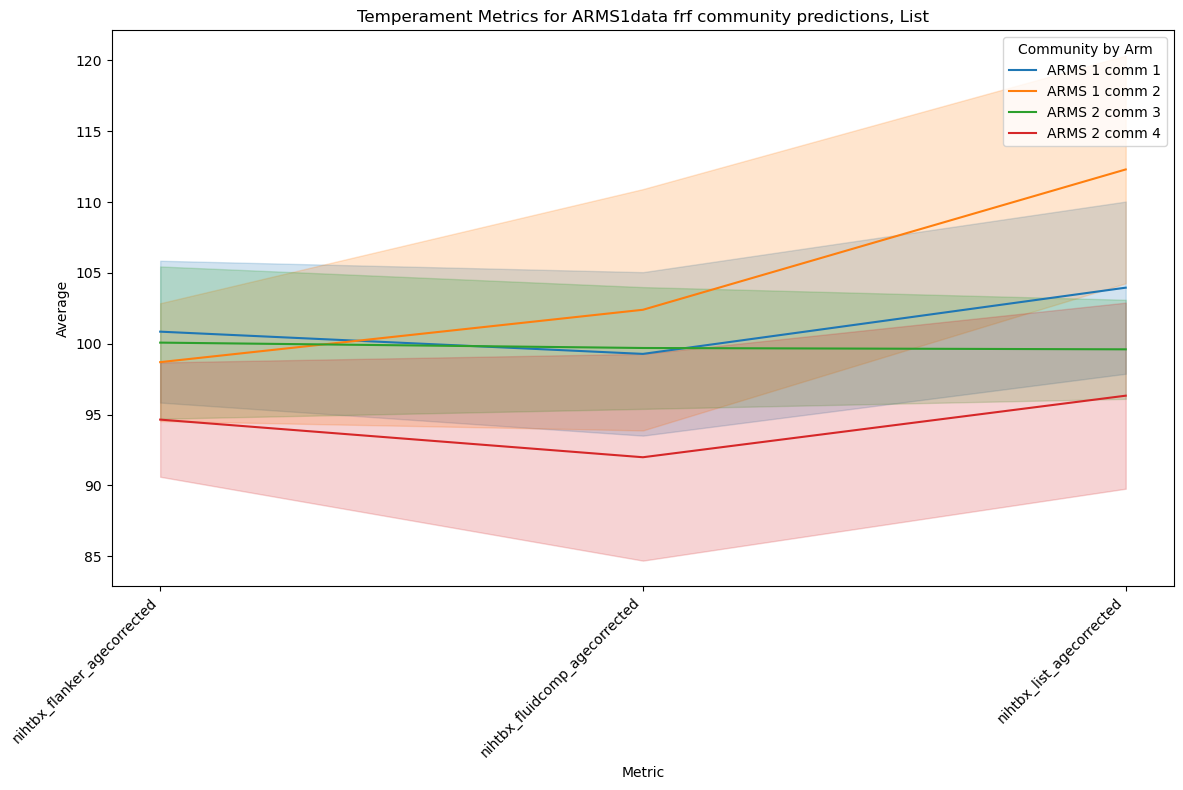

In [76]:
if combined_df is not None:

    colors = list(mcolors.TABLEAU_COLORS.values())
    color_values = {'all': 'black'}
    for i, (arm, community) in enumerate(combined_df.groupby(['arm', 'community']).groups.keys()):
        if community != 'all':
            color_values[f"ARMS {arm} comm {community}"] = colors[i % len(colors)]
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot for each community
    for (arm, community), group in combined_df.groupby(['arm', 'community']):
        color_key = f"ARMS {arm} comm {community}"
        if community == 'all':
            color = 'black'
            label = 'all'
        else:
            color = color_values.get(color_key, 'gray')
            label = color_key
        plt.plot('metric', 'mean', data=group, color=color, label=label)
        plt.fill_between('metric', 'mean-se', 'mean+se', data=group, color=color, alpha=0.2)
    
    # Customize the plot
    plt.xlabel('Metric')
    plt.ylabel('Average')
    plt.title('Temperament Metrics for ARMS1data frf community predictions, List')
    plt.xticks(rotation=45, ha='right')
    
    # Adjust legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    sorted_labels = sorted(by_label.keys(), key=lambda x: (x != 'all', x))
    sorted_handles = [by_label[label] for label in sorted_labels]
    sorted_labels = sorted_labels
    
    # Create the legend with the sorted handles and labels
    plt.legend(sorted_handles, sorted_labels, title="Community by Arm")
    
    plt.tight_layout()
    #plt.savefig('./list_uppsbisbas_allcomms_arm1frf.png', dpi=300, bbox_inches='tight')
    plt.show()